# GEBCO Bathymetry

In [5]:
import odp

Access the gridded data in the ocean data platform

In [6]:
gd=odp.GridData()

### Access through selector

Start selector GUI and select the region of interest with the polygon drawing tool in the map. Note that boundary box of the polygon is used for the selection.

In [7]:
gd.selector()

GridspecLayout(children=(interactive(children=(Dropdown(description='Dataset', options=('KAUST Waves', 'KAUST …

Get the bathymetry within the polygon by calling the data_selection method in the odp sdk

In [9]:
ds=gd.data_selection()
ds

<xarray.Dataset>
Dimensions:    (lat: 1551, lon: 2769)
Coordinates:
    depth      float64 ...
  * lat        (lat) float64 43.0 43.0 43.01 43.01 ... 49.44 49.45 49.45 49.46
  * lon        (lon) float64 -11.36 -11.36 -11.35 ... 0.1646 0.1687 0.1729
    time       datetime64[ns] ...
Data variables:
    crs        |S1 ...
    elevation  (lat, lon) int16 dask.array<chunksize=(481, 27), meta=np.ndarray>
Attributes: (12/36)
    Conventions:                     CF-1.6, ACDD-1.3
    comment:                         The data in the GEBCO_2021 Grid should n...
    creator_email:                   gdacc@seabed2030.org
    creator_name:                    GEBCO through the Nippon Foundation-GEBC...
    creator_type:                    International organisation
    creator_url:                     https://www.gebco.net
    ...                              ...
    node_offset:                     [1.0]
    project:                         Nippon Foundation - GEBCO Seabed2030 Pro...
    references:                      DOI: 10.5285/c6612cbe-50b3-0cff-e053-6c8...
    source:                          The GEBCO_2021 Grid is the latest global...
    summary:                         The GEBCO_2021 Grid is a continuous, glo...
    title:                           The GEBCO_2021 Grid - a continuous terra...

Compute the minimum elevation value from the dask xarray dataset

In [10]:
ds.elevation.min().compute()

<xarray.DataArray 'elevation' ()>
array(-5083, dtype=int16)
Coordinates:
    depth    float64 nan
    time     datetime64[ns] 2021-07-01

Plot the selected elevation data

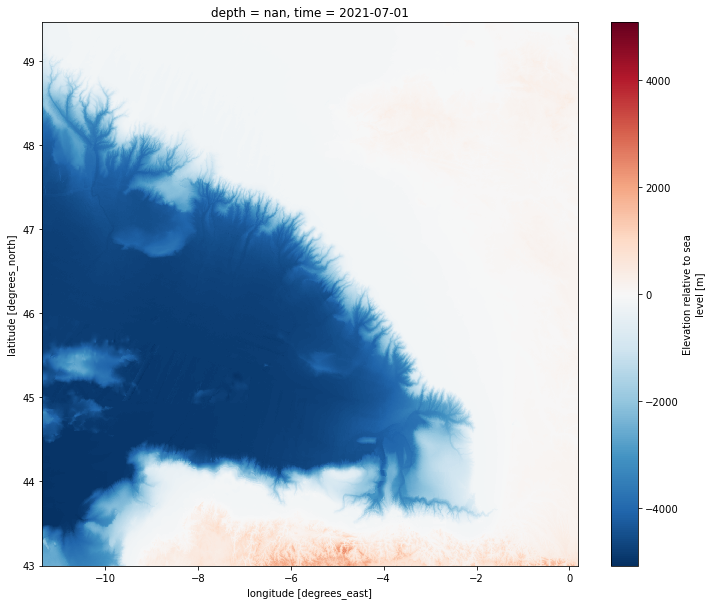

In [11]:
ds.elevation.plot(figsize=(12,10))

### Access through function

List the available datasets for gridded data

In [12]:
gd.datasets

,container,folder,x,y,depth,time
name,,,,,,
KAUST Waves,kaust-zarr,zarr/WAVES/,latitude,longitude,depth,time
KAUST Ocean,kaust-zarr,zarr/Ocean/,latitude,longitude,depth,time
MET,met,zarr/,lat,lon,depth,time
World Ocean Atlas,woa,zarr/woa18_5564_t13_01.zarr,lat,lon,depth,
GEBCO Bathymetry,gebco,zarr/gebco_2021_odp.zarr,lat,lon,,


Open the dataset using the open_dataset method, instead of the graphical selector

In [13]:
ds2=gd.open_dataset('GEBCO Bathymetry')

This method returns the entire dataset without the polygon filter. Elevation values are not downloaded before .compute() is called.

In [14]:
ds2

<xarray.Dataset>
Dimensions:    (lat: 43200, lon: 86400)
Coordinates:
    depth      float64 ...
  * lat        (lat) float64 -90.0 -89.99 -89.99 -89.99 ... 89.99 89.99 90.0
  * lon        (lon) float64 -180.0 -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
    time       datetime64[ns] ...
Data variables:
    crs        |S1 ...
    elevation  (lat, lon) int16 dask.array<chunksize=(675, 2700), meta=np.ndarray>
Attributes: (12/36)
    Conventions:                     CF-1.6, ACDD-1.3
    comment:                         The data in the GEBCO_2021 Grid should n...
    creator_email:                   gdacc@seabed2030.org
    creator_name:                    GEBCO through the Nippon Foundation-GEBC...
    creator_type:                    International organisation
    creator_url:                     https://www.gebco.net
    ...                              ...
    node_offset:                     [1.0]
    project:                         Nippon Foundation - GEBCO Seabed2030 Pro...
    references:                      DOI: 10.5285/c6612cbe-50b3-0cff-e053-6c8...
    source:                          The GEBCO_2021 Grid is the latest global...
    summary:                         The GEBCO_2021 Grid is a continuous, glo...
    title:                           The GEBCO_2021 Grid - a continuous terra...

Compute the elevation at a specific coordinate

In [20]:
ds2.elevation.sel(lon=144.60973445, lat=12.05192707,method='nearest').compute()

<xarray.DataArray 'elevation' ()>
array(-10731, dtype=int16)
Coordinates:
    depth    float64 nan
    lat      float64 12.05
    lon      float64 144.6
    time     datetime64[ns] 2021-07-01
Attributes:
    grid_mapping:        crs
    long_name:           Elevation relative to sea level
    sdn_parameter_name:  Sea floor height (above mean sea level) {bathymetric...
    sdn_parameter_urn:   SDN:P01::ALATZZ01
    sdn_uom_name:        Metres
    sdn_uom_urn:         SDN:P06::ULAA
    standard_name:       height_above_mean_sea_level
    units:               m